In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [19]:
def calculateBezier(pts, t):
    t = t.reshape((-1, 1))
    s = 1 - t
    return s*s*s * pts[0] + 3 * s * t * (s * pts[1] + t * pts[2]) + t*t*t * pts[3]

In [77]:
pts = np.array([[2.0, 1.0], [3.0, -4.0], [3.0, 4.0], [20.0, 0.0]])

In [38]:
def plotBezier(pts, t):
    correct = calculateBezier(pts, np.linspace(0, 1, 1000))
    poly = calculateBezier(pts, t)
    
    plt.figure(figsize=(12, 12))
    plt.plot(pts[:, 0], pts[:, 1], "ro")
    plt.plot(correct[:, 0], correct[:, 1], "k", linewidth=1)
    plt.plot(poly[:, 0], poly[:, 1], linewidth=1)
    plt.axis("equal")
    plt.show()

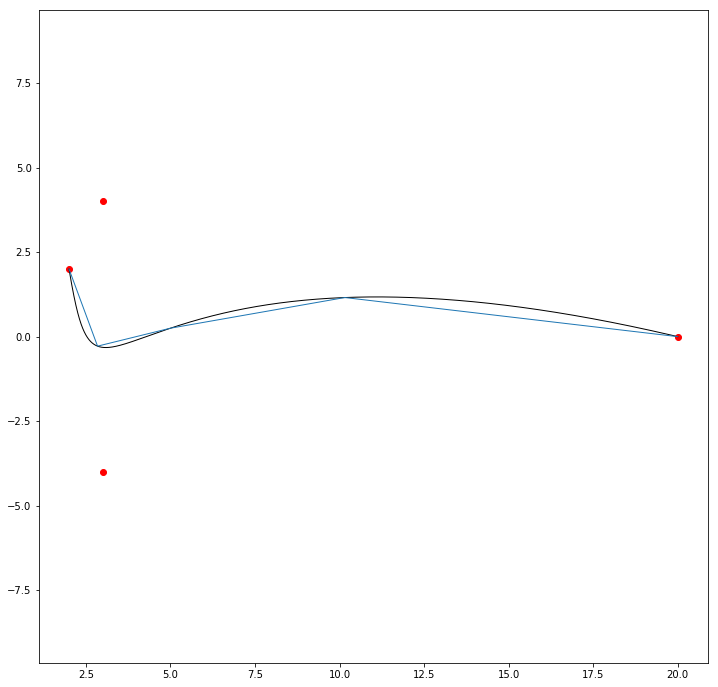

In [49]:
plotBezier(pts, np.linspace(0, 1, 5))

In [57]:
def calculateBezierGradients(pts, t):
    t = t.reshape((-1, 1))
    s = 1 - t
    return -3 * s * s * pts[0] - (1 - (3 * t - 2)**2) * pts[1] + (1 - (3 * t - 1)**2) * pts[2] + 3 * t * t * pts[3]

In [65]:
def plotBezierGradients(pts, t):
    correct = calculateBezier(pts, np.linspace(0, 1, 1000))
    poly = calculateBezier(pts, t)
    grad = calculateBezierGradients(pts, t)
    
    plt.figure(figsize=(12, 12))
    plt.plot(pts[:, 0], pts[:, 1], "ro")
    plt.plot(correct[:, 0], correct[:, 1], "k", linewidth=1)
    plt.plot(poly[:, 0], poly[:, 1], linewidth=1)
    for i in range(t.size):
        plt.plot([poly[i, 0], poly[i, 0] + grad[i, 0] * 0.2], [poly[i, 1], poly[i, 1] + grad[i, 1] * 0.2], "b")
    plt.axis("equal")
    plt.show()

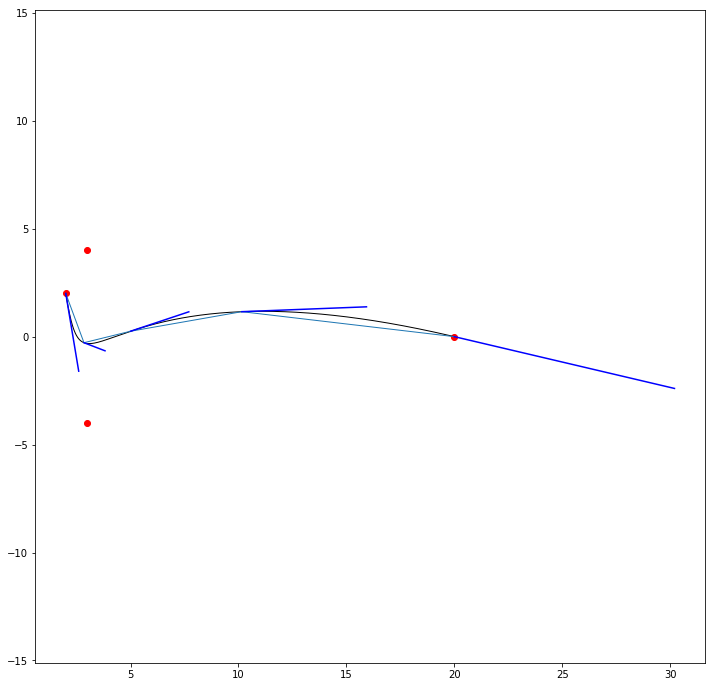

In [66]:
plotBezierGradients(pts, np.linspace(0, 1, 5))

In [69]:
def calculateBezierCurvature(pts, t):
    t = t.reshape((-1, 1))
    s = 1 - t
    return 6 * (s * pts[0] + (1-3*s) * pts[1] + (1-3*t) * pts[2] + t * pts[3])

In [75]:
def plotCurvatureGraph(pts):
    t = np.linspace(0, 1, 1000)
    curve = calculateBezierCurvature(pts, np.linspace(0, 1, 1000))
    
    plt.figure(figsize=(12, 12))
    plt.plot(t, np.linalg.norm(curve, axis=1))
    plt.show()

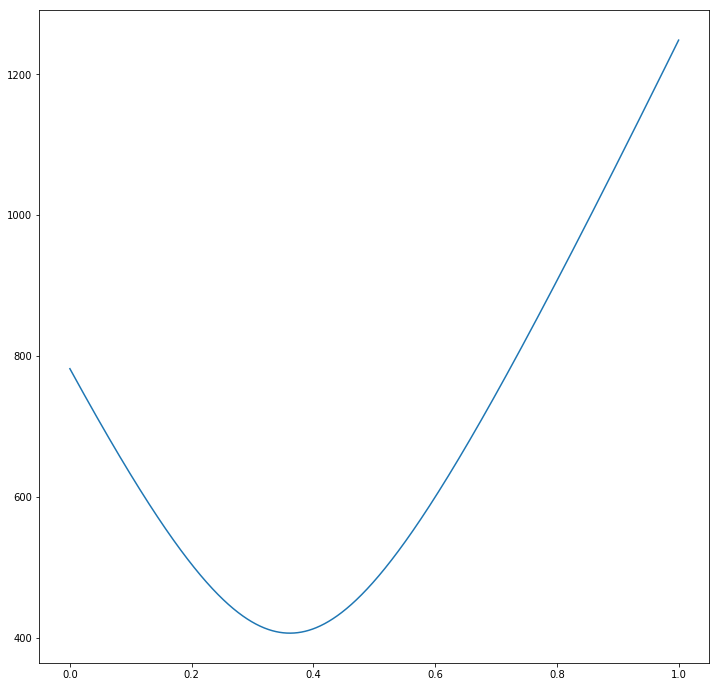

In [79]:
plotCurvatureGraph(pts * 10)

In [82]:
def curvinessness(pts):
    c1 = -pts[0] + 3 * pts[1] - 3 * pts[2] + pts[3]
    c2 = pts[0] - 2 * pts[1] + pts[2]
    nm = 2 * np.sum(c1 * c1) + np.sum(c1 * c2) + np.sum(c2 * c2)
    return np.sqrt(nm)

In [83]:
print(curvinessness(pts))

41.5331193146


In [90]:
print(curvinessness(np.array([[2.0, 1.0], [3.0, 2.0], [-4.0, 3.0], [1.0, 4.0]])))
print(curvinessness(-np.array([[1.0, 4.0], [-4.0, 3.0], [3.0, 2.0], [2.0, 1.0]])))

26.5329983228
26.5329983228
